COVID-19 DATA EXPLORATION & VISUALIZATION

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
import sys
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
data=pd.read_csv('Covid Live.csv')
data.head(6)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
5,6,S. Korea,"24,769,101","28,406",42.0,"24,013,461","727,234",352,"482,547",553,"15,804,065","307,892","51,329,899"


### Cleaning the data
When looking at the data we observe two problems:

Numbers with comma. We need to transform this cells to a number that can be useful in the analysis. We're going to select the object columns and transform to a number column.

Missing Data. I substituted the values for the median with exception of New Deaths, that i assume zero.

In [40]:
data.describe()

,#,New\nDeaths
count,230.000000,3.0
mean,115.500000,18.0
std,66.539462,21.0
min,1.000000,3.0
25%,58.250000,6.0
50%,115.500000,9.0
75%,172.750000,25.5
max,230.000000,42.0


In [41]:
data.columns
data.columns = ['Id', 'Country', 'TotalCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'SeriousCritical',
       'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',
       'Tests1Mpop', 'Population']
data = data.set_index('Id')

In [42]:
data.head(6)

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
6,S. Korea,"24,769,101","28,406",42.0,"24,013,461","727,234",352,"482,547",553,"15,804,065","307,892","51,329,899"


In [43]:
data.dtypes
col = data.select_dtypes(include = "object").columns
col = col[ col != 'Country']
col

Index(['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
       'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests',
       'Tests1Mpop', 'Population'],
      dtype='object')

In [44]:
data.columns

Index(['Country', 'TotalCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop',
       'TotalTests', 'Tests1Mpop', 'Population'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 1 to 230
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          230 non-null    object 
 1   TotalCases       230 non-null    object 
 2   TotalDeaths      225 non-null    object 
 3   NewDeaths        3 non-null      float64
 4   TotalRecovered   214 non-null    object 
 5   ActiveCases      215 non-null    object 
 6   SeriousCritical  147 non-null    object 
 7   TotCases1Mpop    228 non-null    object 
 8   Deaths1Mpop      223 non-null    object 
 9   TotalTests       214 non-null    object 
 10  Tests1Mpop       214 non-null    object 
 11  Population       228 non-null    object 
dtypes: float64(1), object(11)
memory usage: 23.4+ KB


In [46]:
data['TotalCases'] = data['TotalCases'].str.replace(",", "").astype(float)
data['SeriousCritical'] = data['SeriousCritical'].str.replace(",", "").astype(float)
data['Tests1Mpop'] = data['Tests1Mpop'].str.replace(",", "").astype(float)
data[ 'TotalDeaths'] = data[ 'TotalDeaths'].str.replace(",", "").astype(float)
data[ 'TotCases1Mpop'] = data[ 'TotCases1Mpop'].str.replace(",", "").astype(float)
data[ 'Population'] = data[ 'Population'].str.replace(",", "").astype(float)
data[ 'TotalRecovered'] = data[ 'TotalRecovered'].str.replace(",", "").astype(float)
data[ 'Deaths1Mpop'] = data[ 'Deaths1Mpop'].str.replace(",", "").astype(float)
data[ 'ActiveCases'] = data[ 'ActiveCases'].str.replace(",", "").astype(float)
data[ 'TotalTests'] = data[ 'TotalTests'].str.replace(",", "").astype(float)

In [47]:
data.head(20)

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,98166904.0,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
2,India,44587307.0,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
3,France,35342950.0,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
4,Brazil,34706757.0,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
5,Germany,33312373.0,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
6,S. Korea,24769101.0,28406.0,42.0,24013461.0,727234.0,352.0,482547.0,553.0,1.580406e+07,307892.0,5.132990e+07
7,UK,23621952.0,189919.0,NaN,23347871.0,84162.0,146.0,344857.0,2773.0,5.225265e+08,7628357.0,6.849791e+07
8,Italy,22432803.0,177054.0,NaN,21779604.0,476145.0,141.0,372250.0,2938.0,2.466365e+08,4092684.0,6.026277e+07
9,Japan,21229216.0,44678.0,NaN,20380089.0,804449.0,204.0,169043.0,356.0,7.620141e+07,606772.0,1.255848e+08


In [49]:
data.isnull().sum()

Country              0
TotalCases           0
TotalDeaths          5
NewDeaths          227
TotalRecovered      16
ActiveCases         15
SeriousCritical     83
TotCases1Mpop        2
Deaths1Mpop          7
TotalTests          16
Tests1Mpop          16
Population           2
dtype: int64

Fill the null values

In [52]:
data['NewDeaths'].fillna(0, inplace=True)
data['TotalDeaths'].fillna(sts.mean(data['TotalDeaths'].dropna()), inplace=True)
data['TotalRecovered'].fillna(sts.mean(data['TotalRecovered'].dropna()), inplace=True)
data['ActiveCases'].fillna(sts.mean(data['ActiveCases'].dropna()), inplace=True)
data['SeriousCritical'].fillna(sts.mean(data['SeriousCritical'].dropna()), inplace=True)
data['TotCases1Mpop'].fillna(sts.mean(data['TotCases1Mpop'].dropna()), inplace=True)
data['Deaths1Mpop'].fillna(sts.mean(data['Deaths1Mpop'].dropna()), inplace=True)
data['TotalTests'].fillna(sts.mean(data['TotalTests'].dropna()), inplace=True)
data['Tests1Mpop'].fillna(sts.mean(data['Tests1Mpop'].dropna()), inplace=True)
data['Population'].fillna(sts.mean(data['Population'].dropna()), inplace=True)

data.isnull().sum()

Country            0
TotalCases         0
TotalDeaths        0
NewDeaths          0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
TotCases1Mpop      0
Deaths1Mpop        0
TotalTests         0
Tests1Mpop         0
Population         0
dtype: int64

In [53]:
data.isnull().sum()

Country            0
TotalCases         0
TotalDeaths        0
NewDeaths          0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
TotCases1Mpop      0
Deaths1Mpop        0
TotalTests         0
Tests1Mpop         0
Population         0
dtype: int64

In [54]:
data.describe()

,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.909820e+04,0.234783,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,8.779899e+06,1.010917e+05,2.835614,8.501757e+06,2.004752e+05,736.746974,181574.374660,1227.784889,1.103852e+08,3.366370e+06,1.383153e+08
min,9.000000e+00,1.000000e+00,0.000000,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.160000e+02,0.000000,2.449950e+04,1.700000e+02,10.000000,17017.500000,174.250000,4.007550e+05,1.968250e+05,5.476582e+05
50%,2.037110e+05,2.454000e+03,0.000000,3.248420e+05,2.192000e+03,122.500000,120642.500000,827.500000,2.681464e+06,1.061616e+06,5.889248e+06
75%,1.256286e+06,1.624250e+04,0.000000,2.399912e+06,3.082250e+04,270.224490,292559.750000,1896.750000,2.071086e+07,2.072495e+06,2.546516e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


<Axes: xlabel='Deaths1Mpop', ylabel='TotCases1Mpop'>

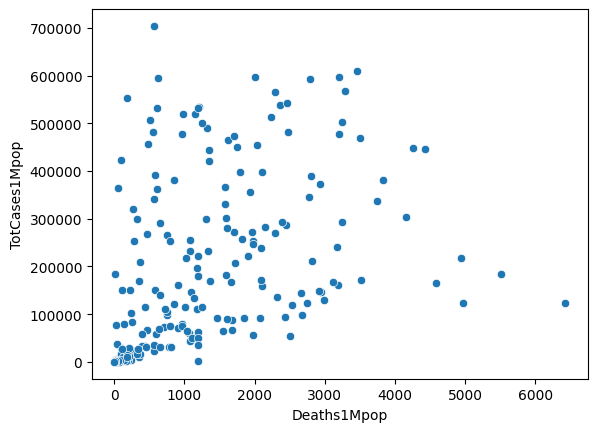

In [55]:
sns.scatterplot(x="Deaths1Mpop",y="TotCases1Mpop",data=data)

<Axes: xlabel='TotCases1Mpop', ylabel='SeriousCritical'>

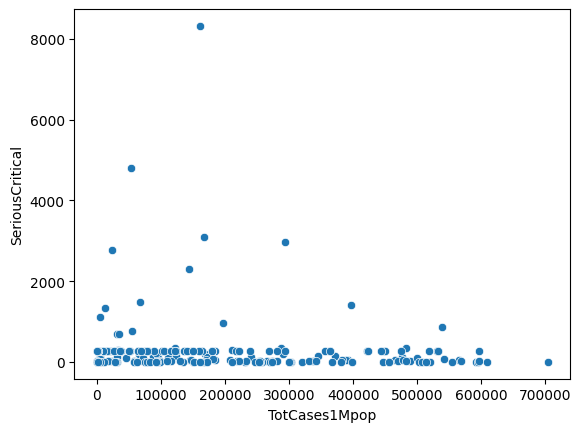

In [56]:
sns.scatterplot(x="TotCases1Mpop",y="SeriousCritical",data=data)

To have a better visibility of this relation i will adjust the variable of total cases per 1M population. Creating a categorical variable it can be useful a barplot and boxplot

In [57]:
data['CasesGroup']=pd.cut(

   data['TotCases1Mpop'],

   bins=[100000, 200000, 300000, 400000, 500000, 600000, 700000, sys.maxsize],

   labels=['<100K' , '< 200K' , '< 300K' , '< 400K' , '< 500K' , '< 600K' , '< 700K']

)

<Axes: xlabel='CasesGroup', ylabel='SeriousCritical'>

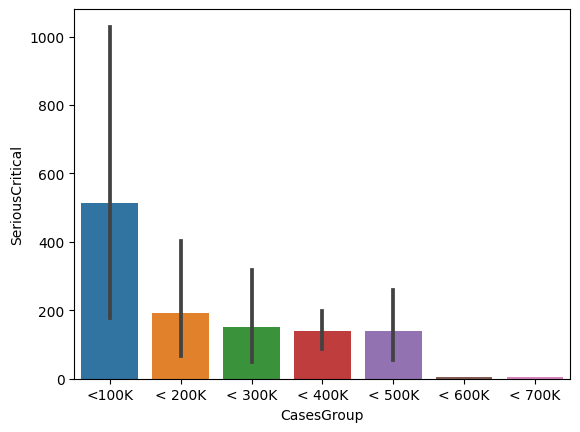

In [58]:
sns.barplot(x = "CasesGroup",y = "SeriousCritical", data = data)

<Axes: xlabel='CasesGroup', ylabel='SeriousCritical'>

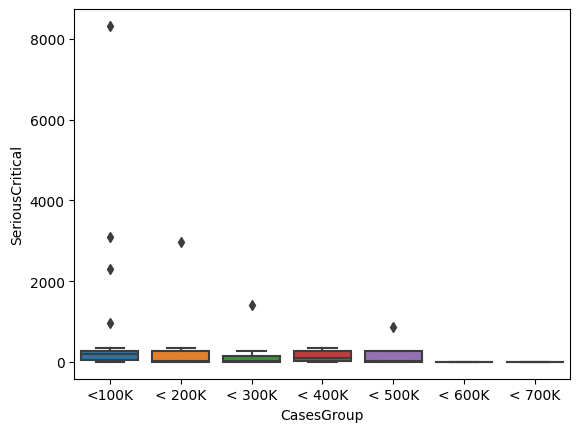

In [59]:
sns.boxplot(x = "CasesGroup",y = "SeriousCritical", data = data)

In [60]:
def removeoutlier(values):

    fator = 1.5

    q3, q1 = np.percentile(values, [75, 25])

    iqr = q3 - q1

    lowpass = q1 - (iqr * fator)

    highpass = q3 + (iqr * fator)

    return [v for v in values if v > lowpass and v < highpass]


nooutlier = removeoutlier(data['SeriousCritical'])
dataaux = data[data.SeriousCritical.isin(nooutlier)]


<Axes: xlabel='CasesGroup', ylabel='SeriousCritical'>

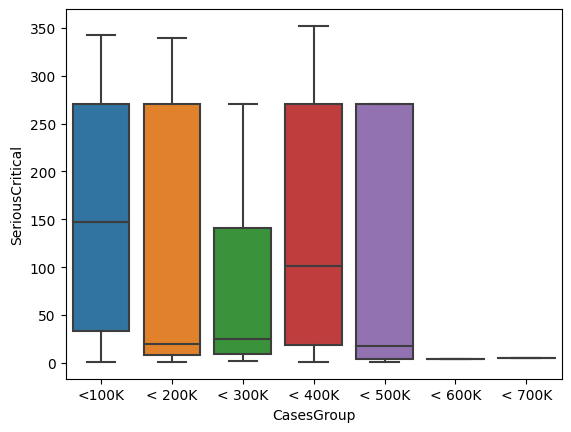

In [61]:
sns.boxplot(x = "CasesGroup",y = "SeriousCritical", data = dataaux)

In [62]:
corr = data.corr()
sns.heatmap(corr)

ValueError: could not convert string to float: 'USA'